In [1]:
import os
import re
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
f=nc.Dataset('/data/eolson/MEOPAR/SS2DSOGruns/runSOG_01_b/SalishSea_1h_20041019_20041020_ptrc_T.nc')

In [3]:
print f.variables.keys()

[u'nav_lon', u'nav_lat', u'deptht', u'time_counter', u'time_counter_bnds', u'NO3', u'NH4', u'Si', u'PHY2', u'PHY', u'ZOO2', u'ZOO', u'DOC', u'POC', u'DSi', u'O2']


In [4]:
print f.variables['PHY2']

<type 'netCDF4.Variable'>
float32 PHY2(time_counter, deptht, y, x)
    units: mmol/m3
    standard_name: Diatoms Concentration
    _FillValue: 9.96921e+36
    long_name: Diatoms Concentration
    online_operation: ave(X)
    interval_operation: 10.0
    interval_write: 3600.0
    coordinates: time_counter deptht nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (36, 101, 10, 1100)
filling off



In [5]:
print np.size(f.variables['PHY2'].shape)
print f.variables['PHY2'].shape[1]
print f.variables['PHY2'].shape[2]

4
101
10


In [9]:
fkeys=f.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
z=f.variables[zkey][:]
t=f.variables['time_counter'][:]
xx,zz=np.meshgrid(lons,-z[:])
tt,tz=np.meshgrid(t,-z[:])
xt,yt=np.meshgrid(lons,lats)
print tt

[[   1800.    5400.    9000. ...,  120600.  124200.  127800.]
 [   1800.    5400.    9000. ...,  120600.  124200.  127800.]
 [   1800.    5400.    9000. ...,  120600.  124200.  127800.]
 ..., 
 [   1800.    5400.    9000. ...,  120600.  124200.  127800.]
 [   1800.    5400.    9000. ...,  120600.  124200.  127800.]
 [   1800.    5400.    9000. ...,  120600.  124200.  127800.]]


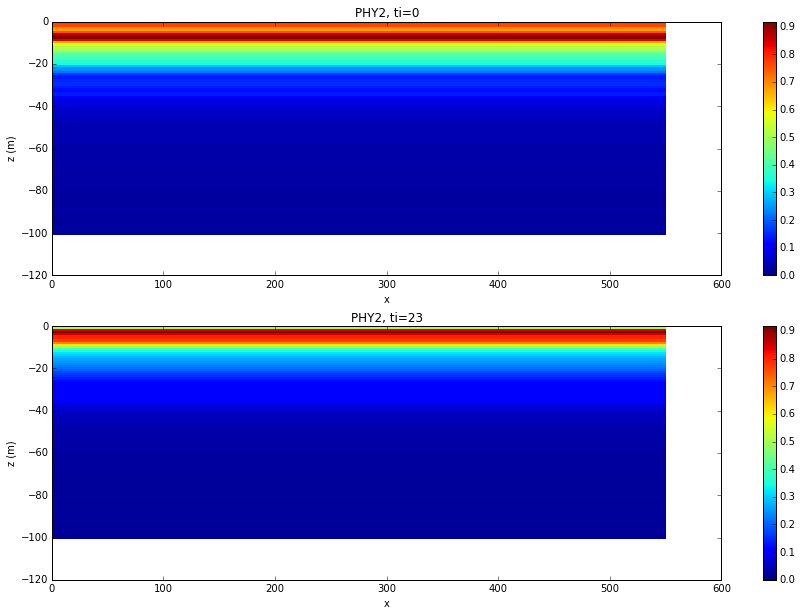

In [7]:
fig, axs = plt.subplots(2,1,figsize=(15,10))
mesh0=axs[0].pcolormesh(xx,zz,f.variables['PHY2'][0,:,5,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('x')
axs[0].set_title('PHY2, ti=0')

mesh1=axs[1].pcolormesh(xx,zz,f.variables['PHY2'][35,:,5,:])
fig.colorbar(mesh0,ax=axs[1])
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('x')
axs[1].set_title('PHY2, ti=23')

NO3
NH4
Si
PHY2
PHY
ZOO2
ZOO
DOC
POC
DSi
O2


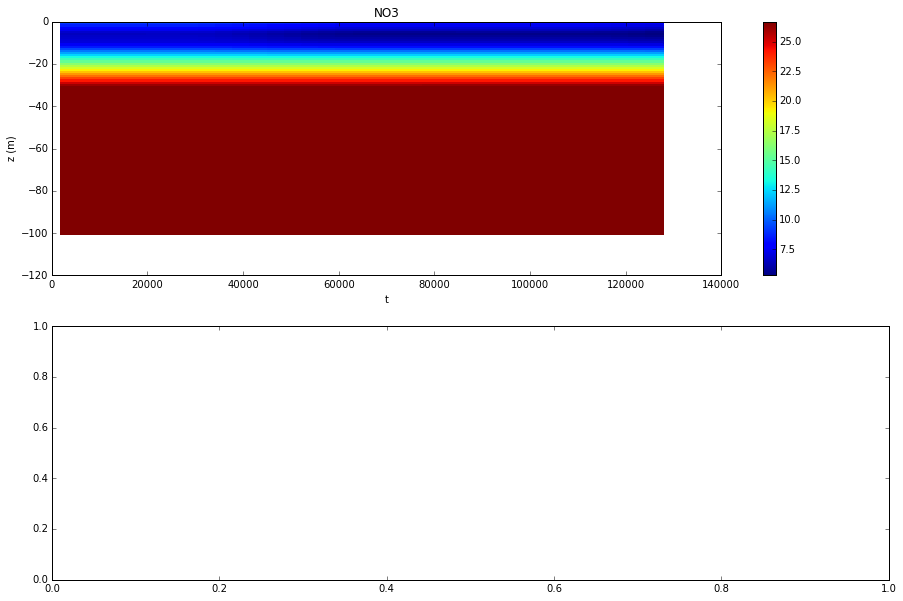

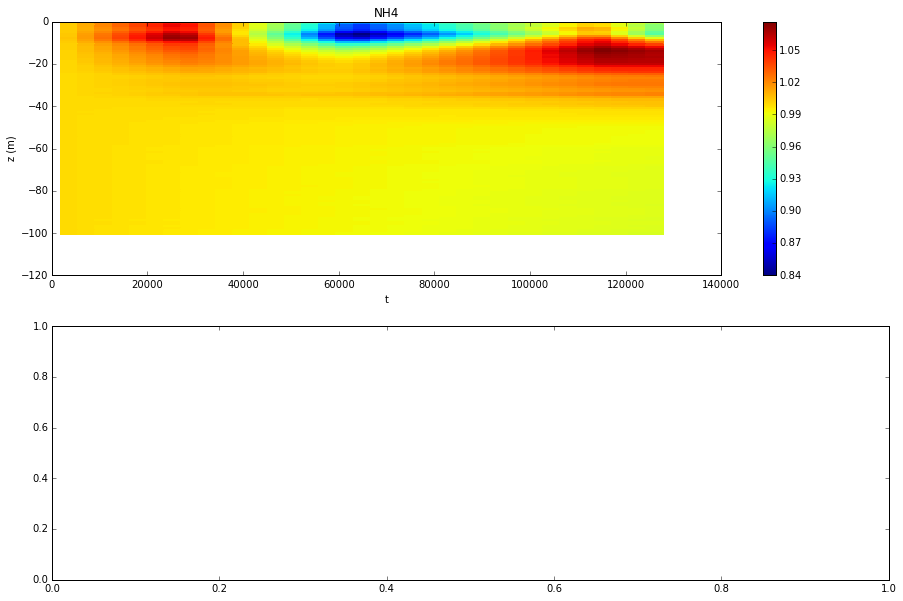

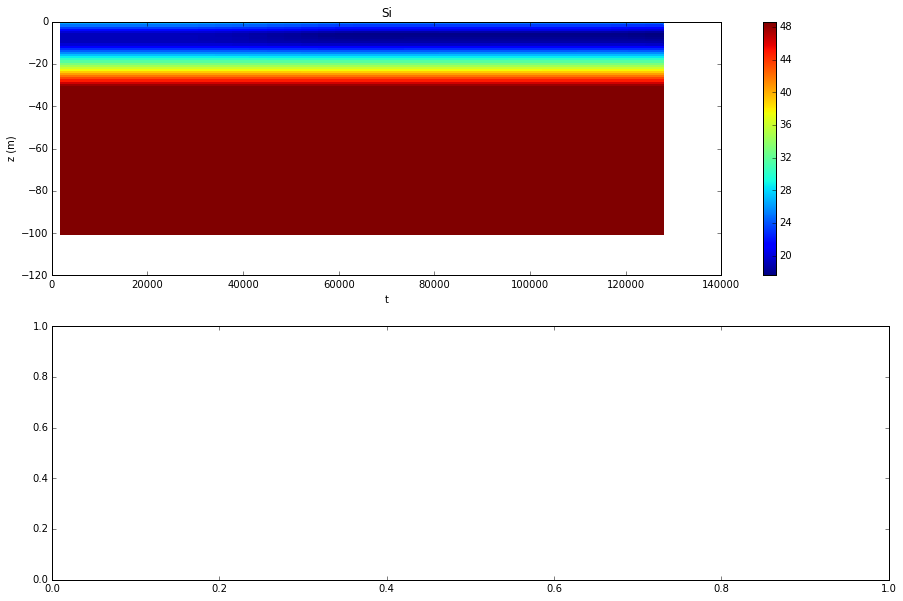

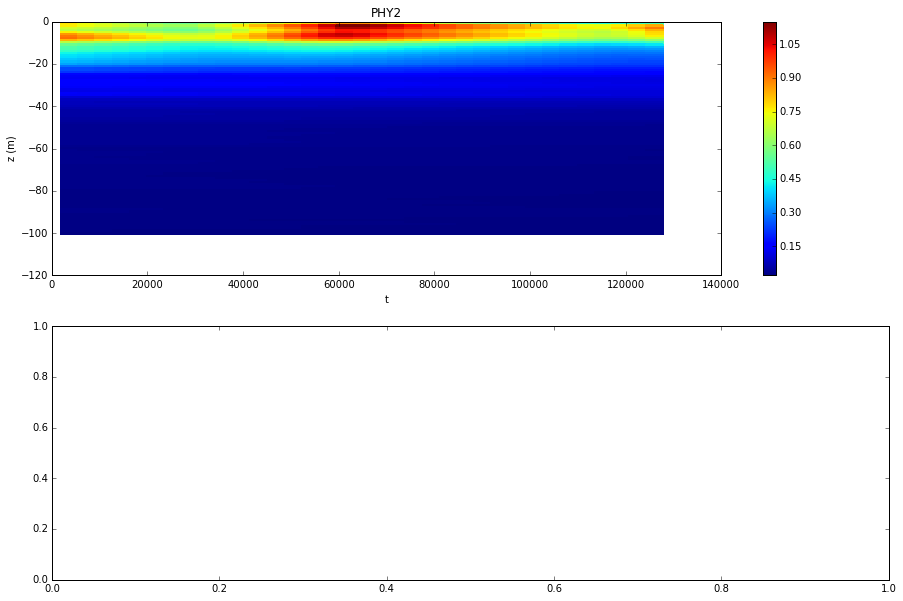

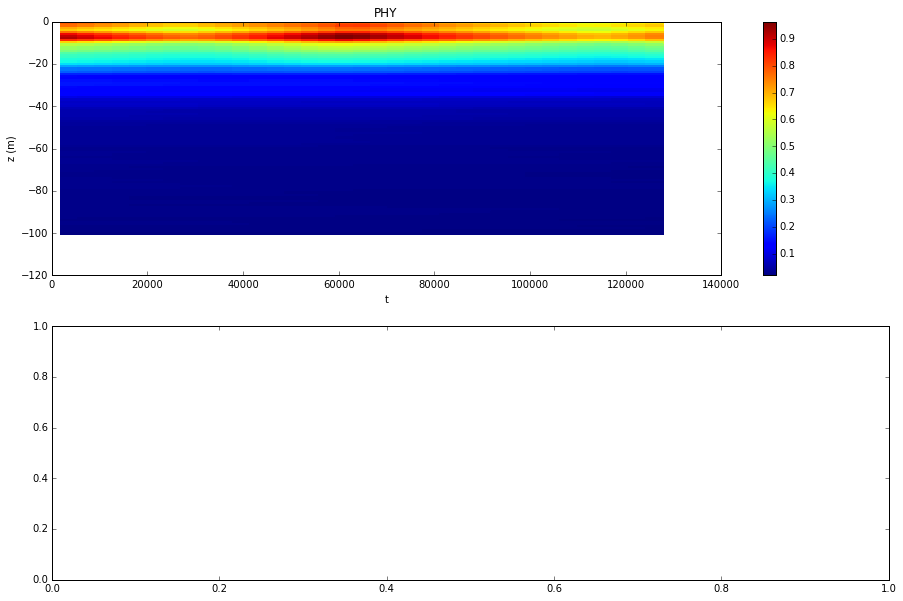

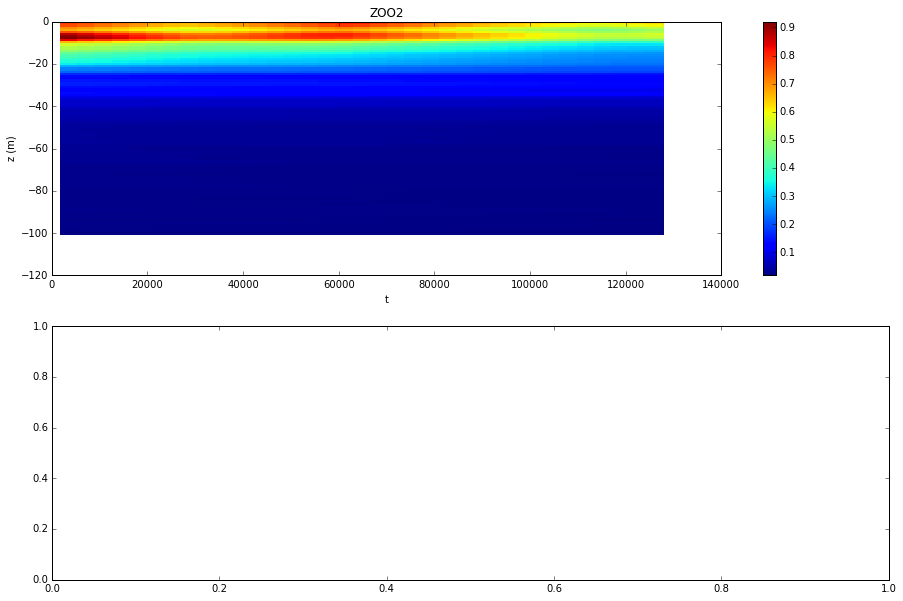

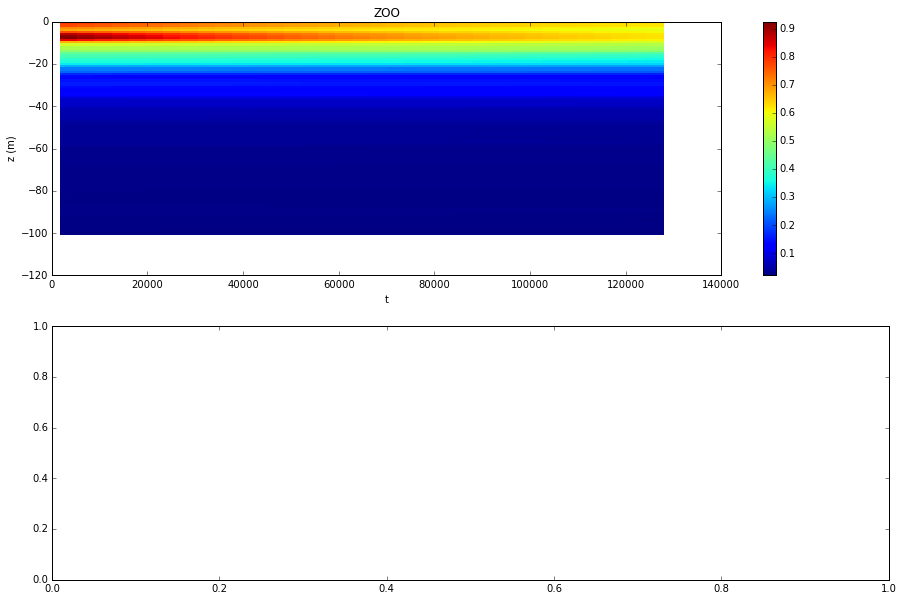

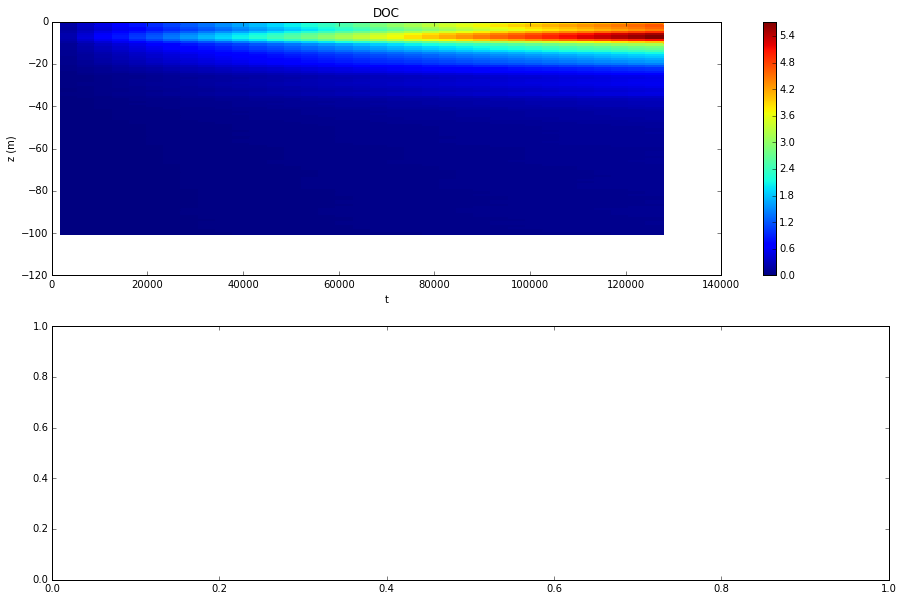

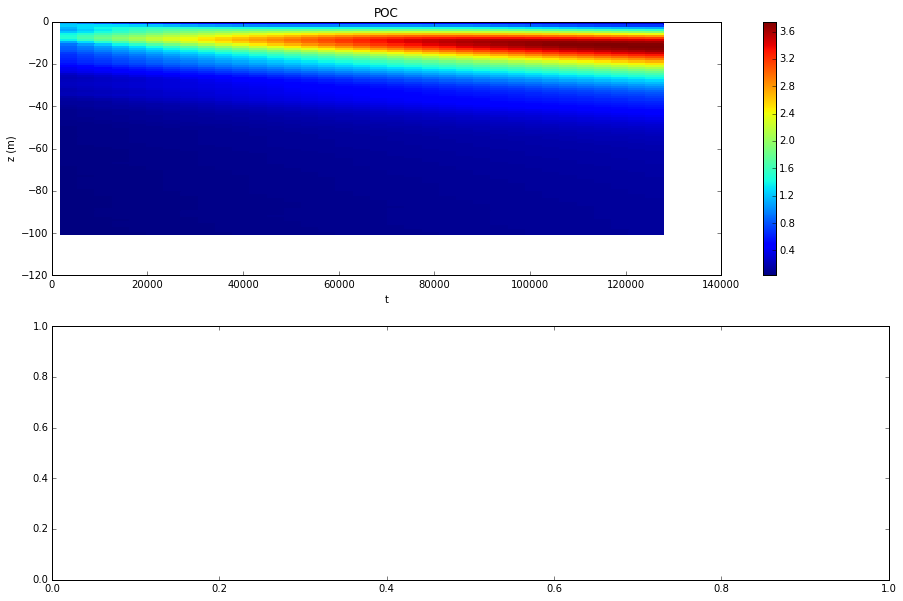

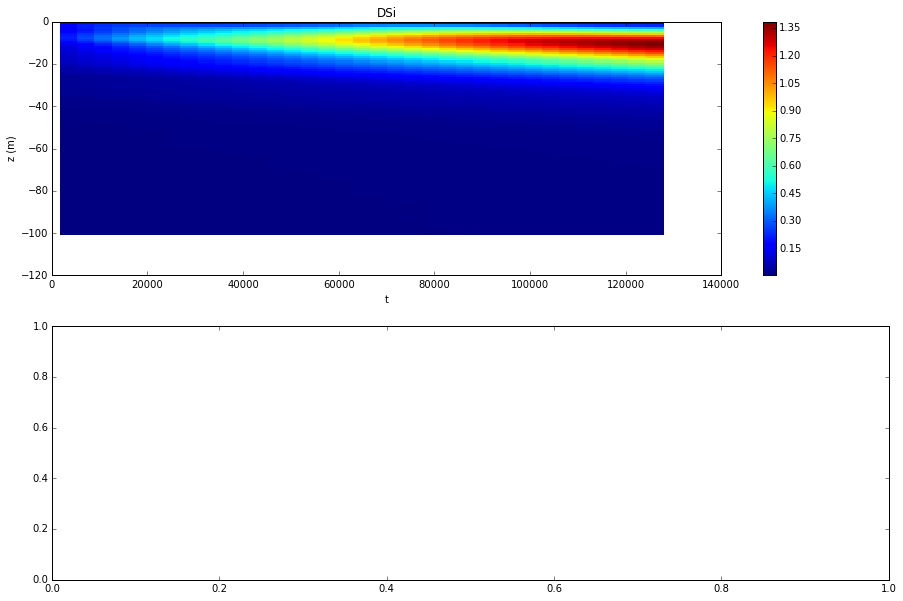

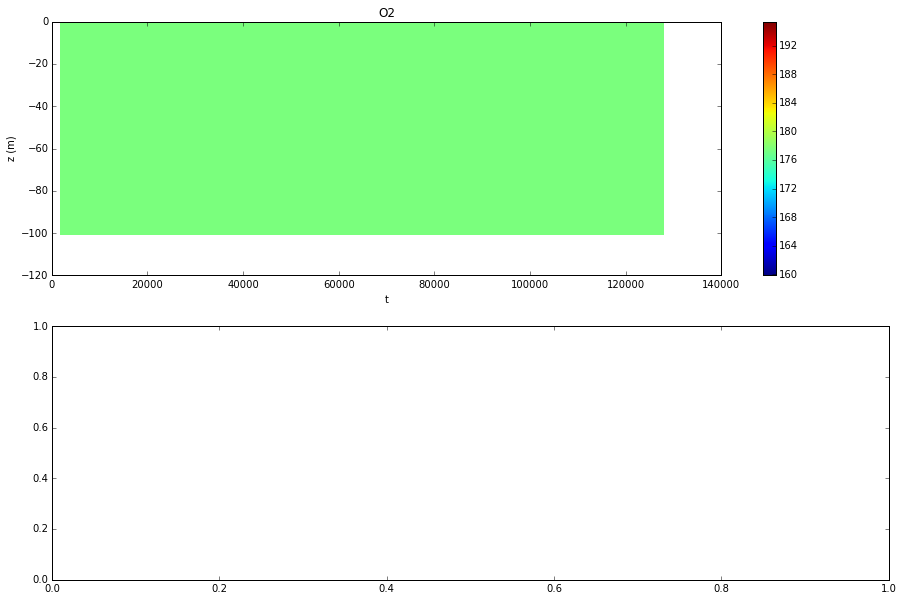

In [10]:
for ik in fkeys:
    if np.size(f.variables[ik].shape) == 4:
        fig, axs = plt.subplots(2,1,figsize=(15,10))
        print ik
        mesh0=axs[0].pcolormesh(tt,tz,f.variables[ik][:,:,5,5].conj().transpose())
        fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('z (m)')
        axs[0].set_xlabel('t')
        axs[0].set_title(ik)


In [4]:
print f.variables['PHY2']

<type 'netCDF4.Variable'>
float32 PHY2(time_counter, deptht, y, x)
    units: mmol/m3
    standard_name: Diatoms Concentration
    _FillValue: 9.96921e+36
    long_name: Diatoms Concentration
    online_operation: ave(X)
    interval_operation: 10.0
    interval_write: 3600.0
    coordinates: time_counter deptht nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (0, 101, 5, 276)
filling off



In [2]:
rDir1='/data/eolson/MEOPAR/SS2DSOGruns/runSOG_physRiver/'
rDir2='/data/eolson/MEOPAR/SS2DSOGruns/runSOG_02/'
fname1='SalishSea_1h_20041019_20041019_grid_T.nc'
fname2='SalishSea_1h_20041019_20041019_grid_T.nc'
fname3='SalishSea_1h_20041019_20041019_ptrc_T.nc'

fp1=nc.Dataset(os.path.join(rDir1,fname1))
fp2=nc.Dataset(os.path.join(rDir2,fname2))
fb2=nc.Dataset(os.path.join(rDir2,fname3))

fkeys=fp1.variables.keys()
lons=fp1.variables['nav_lon'][1,:]
lats=fp1.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
z=fp1.variables[zkey][:]
xx,zz=np.meshgrid(lons,-z[:])
xt,yt=np.meshgrid(lons,lats)
print fkeys
print fp1.variables['votemper']

[u'nav_lon', u'nav_lat', u'deptht', u'time_counter', u'time_counter_bnds', u'sossheig', u'votemper', u'vosaline', u'rain_rate', u'snow_rate']
<type 'netCDF4.Variable'>
float32 votemper(time_counter, deptht, y, x)
    units: degC
    standard_name: temperature
    _FillValue: 9.96921e+36
    long_name: temperature
    online_operation: ave(X)
    interval_operation: 10.0
    interval_write: 3600.0
    coordinates: time_counter deptht nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (24, 101, 10, 1100)
filling off



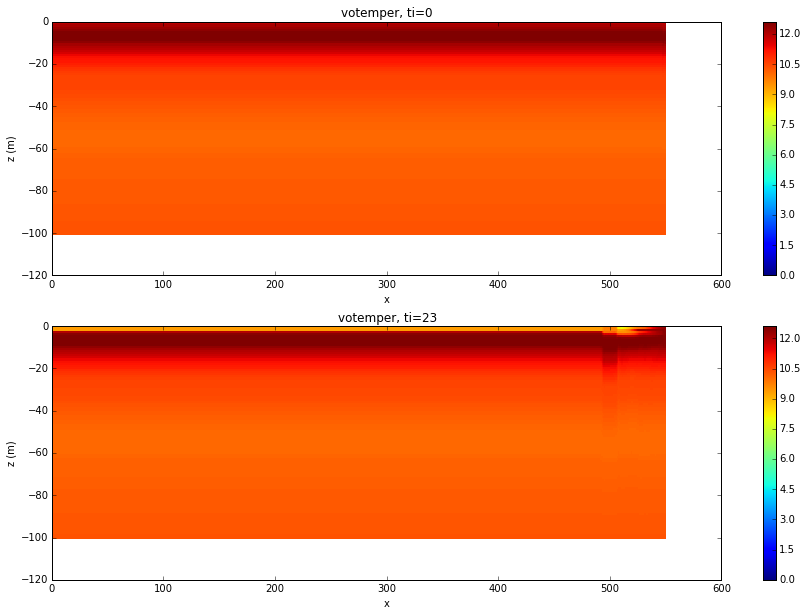

In [3]:
fig, axs = plt.subplots(2,1,figsize=(15,10))
mesh0=axs[0].pcolormesh(xx,zz,fp1.variables['votemper'][0,:,5,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('x')
axs[0].set_title('votemper, ti=0')


mesh1=axs[1].pcolormesh(xx,zz,fp1.variables['votemper'][23,:,5,:])
fig.colorbar(mesh0,ax=axs[1])
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('x')
axs[1].set_title('votemper, ti=23')

In [4]:
print np.max(fp1.variables['votemper'][0,:,:,:])
print np.max(fp2.variables['votemper'][0,:,:,:])

12.606
12.606


In [5]:
print np.max(fp1.variables['votemper'][0,:,:,:]-fp2.variables['votemper'][0,:,:,:])

0.0


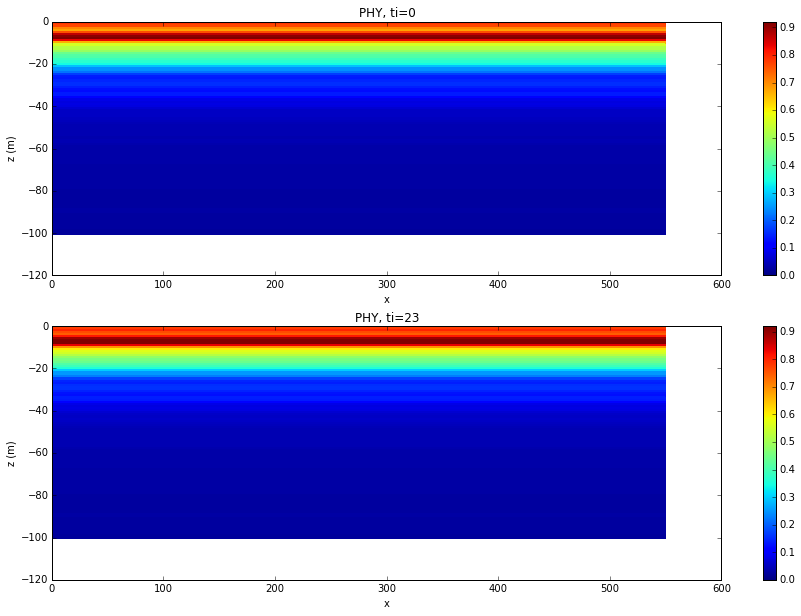

In [6]:
fig, axs = plt.subplots(2,1,figsize=(15,10))
mesh0=axs[0].pcolormesh(xx,zz,fb2.variables['PHY'][0,:,5,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('x')
axs[0].set_title('PHY, ti=0')


mesh1=axs[1].pcolormesh(xx,zz,fb2.variables['PHY'][23,:,5,:])
fig.colorbar(mesh0,ax=axs[1])
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('x')
axs[1].set_title('PHY, ti=23')